In [5]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [6]:
#importing the data
df=pd.read_csv('nifty.csv')
#set the index as date
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

In [7]:
#showing the data
df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
2016-12-08,2016-12-08,8152.100098,8256.250000,8151.750000,8246.849609,8246.849609,142500.0
2016-12-09,2016-12-09,8271.700195,8274.950195,8241.950195,8261.750000,8261.750000,149700.0
2016-12-12,2016-12-12,8230.650391,8230.650391,8154.450195,8170.799805,8170.799805,108100.0
2016-12-13,2016-12-13,8196.150391,8228.849609,8155.799805,8221.799805,8221.799805,184000.0


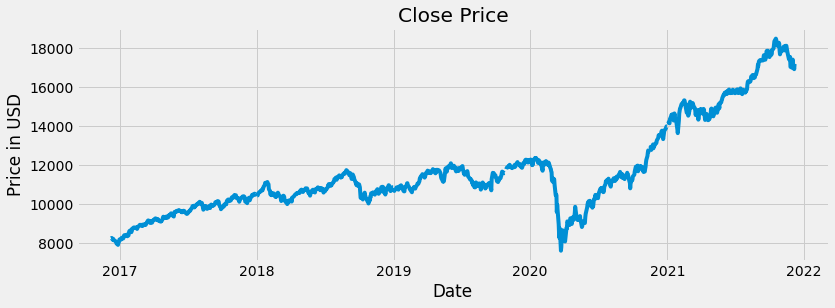

In [8]:
#plot the data
plt.figure(figsize=(12,4))
plt.plot(df.Close)
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [10]:
#calculating the fibonnaci retracement level
max_price=df['Close'].max()
min_price=df['Close'].min()
difference = max_price-min_price
print(difference)

10866.800781000002


In [15]:
#calculating fibonnaci levels
first_level=max_price-difference*0.236
second_level=max_price-difference*0.382
third_level=max_price-difference*0.5
fourth_level=max_price-difference*0.618


In [16]:
#calculating the MACD line and the signal line indicator
#calculate the short term Exponential Moving Average
ShortEMA=df.Close.ewm(span=12,adjust=False).mean()
#calculating the Longema
LongEMA=df.Close.ewm(span=26,adjust=False).mean()
#calculate the Moving Average Convergance/Divergance
MACD=ShortEMA-LongEMA
#calculate the signal line
signal=MACD.ewm(span=9,adjust=False).mean()


Text(0, 0.5, 'MACD')

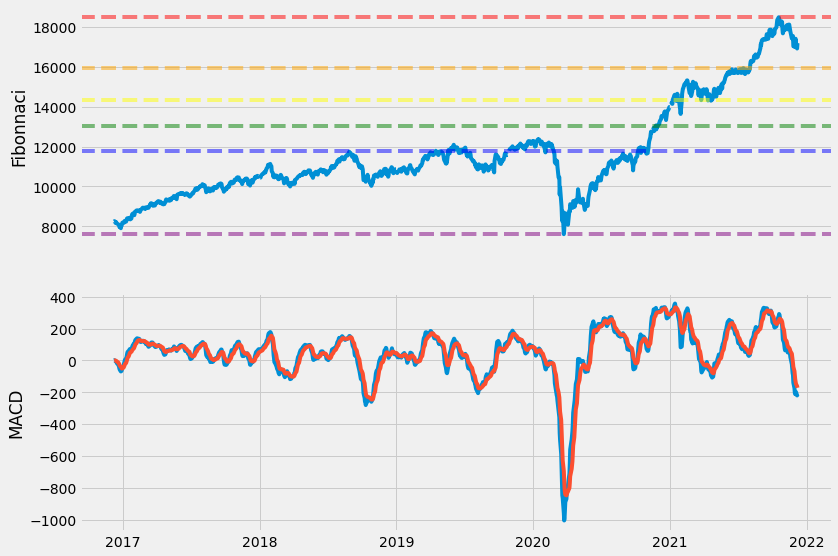

In [18]:
#Plot the fibonnaci level alng with close price and the MACD and the signal line
new_df=df
#plot the fibonnaci levels
plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.plot(new_df.index,new_df['Close'])
plt.axhline(max_price,linestyle='--',alpha=0.5,color='red')
plt.axhline(first_level,linestyle='--',alpha=0.5,color='orange')
plt.axhline(second_level,linestyle='--',alpha=0.5,color='yellow')
plt.axhline(third_level,linestyle='--',alpha=0.5,color='green')
plt.axhline(fourth_level,linestyle='--',alpha=0.5,color='blue')
plt.axhline(min_price,linestyle='--',alpha=0.5,color='purple')
plt.ylabel('Fibonnaci')
frame1=plt.gca()
frame1.axes.get_xaxis().set_visible(False)



plt.subplot(2,1,2)
plt.plot(new_df.index,MACD)
plt.plot(new_df.index,signal)
plt.ylabel('MACD')


In [19]:
#create new columns for the data frame
df['MACD']=MACD
df['Signal Line']=signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
2016-12-08,2016-12-08,8152.100098,8256.250000,8151.750000,8246.849609,8246.849609,142500.0,0.000000,0.000000
2016-12-09,2016-12-09,8271.700195,8274.950195,8241.950195,8261.750000,8261.750000,149700.0,1.188635,0.237727
2016-12-12,2016-12-12,8230.650391,8230.650391,8154.450195,8170.799805,8170.799805,108100.0,-5.148930,-0.839604
2016-12-13,2016-12-13,8196.150391,8228.849609,8155.799805,8221.799805,8221.799805,184000.0,-5.987205,-1.869125
2016-12-14,2016-12-14,8229.349609,8229.400391,8165.100098,8182.450195,8182.450195,144600.0,-9.714744,-3.438248
...,...,...,...,...,...,...,...,...,...
2021-12-01,2021-12-01,17104.400391,17213.050781,17064.250000,17166.900391,17166.900391,295500.0,-212.305335,-118.726063
2021-12-02,2021-12-02,17183.199219,17420.349609,17149.300781,17401.650391,17401.650391,279900.0,-196.614280,-134.303707
2021-12-03,2021-12-03,17424.900391,17489.800781,17180.800781,17196.699219,17196.699219,292500.0,-198.429481,-147.128862
2021-12-06,2021-12-06,17209.050781,17216.750000,16891.699219,16912.250000,16912.250000,231700.0,-220.281448,-161.759379


In [21]:
#create a functon to be used in our strategy to get the 
#upper Fibonaci level and the lower Fibonacci level
def getlevels(price):
    if price>=first_level:
        return(max_price,first_level)
    elif price>=second_level:
        return(first_level,second_level)
    elif price>=third_level:
        return(second_level,third_level)
    elif price>=fourth_level:
        return(third_level,fourth_level)
    else:
        return(fourth_level,min_price)
    
        

In [24]:
#create a function for the trading strategy
#The strategy
#when the signal line crosses above the MACD line and the
#current price cross above or below the last Fibonnaci level than
#buy
#if the signal the crosses below the MACD line and the current price 
#Never sell at the price that's lower then I bough


def strategy(df):
    buy_list=[]
    sell_list=[]
    flag=0
    last_buy_price=0
    #Loop through the dataset
    for i in range(0,df.shape[0]):
        price=df['Close'][i]
        #if this is the first data point within the data set, then get the level above and belo0w it.
        if i==0:
            upper_lvl,lower_lvl=getlevels(price)
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        elif price>=upper_lvl or price <=lower_lvl:
        #Check to see if the MACD line crossed above or below the signal line
            if df['Signal Line'][i]>df['MACD'][i] and flag==0:
                last_buy_price=price
                buy_list.append(price)
                sell_list.append(np.nan)
                #set the flag to 1 to signal that the share was bought
                flag=1
            elif df['Signal Line'][i]<df['MACD'][i] and flag==1 and price >last_buy_price:
                buy_list.append(np.nan)
                sell_list.append(price)
                #set the flag to 0 to signal that the share was sold
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        #update the new levels
        upper_lvl,lower_lvl=getlevels(price)
    return buy_list,sell_list

            
            



In [25]:
#Create the buy and sell columns
buy,sell=strategy(df)
df['Buy_Signal_Price']=buy
df['Sell_Signal_Price']=sell


In [26]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2016-12-08,2016-12-08,8152.100098,8256.250000,8151.750000,8246.849609,8246.849609,142500.0,0.000000,0.000000,NaN,NaN
2016-12-09,2016-12-09,8271.700195,8274.950195,8241.950195,8261.750000,8261.750000,149700.0,1.188635,0.237727,NaN,NaN
2016-12-12,2016-12-12,8230.650391,8230.650391,8154.450195,8170.799805,8170.799805,108100.0,-5.148930,-0.839604,NaN,NaN
2016-12-13,2016-12-13,8196.150391,8228.849609,8155.799805,8221.799805,8221.799805,184000.0,-5.987205,-1.869125,NaN,NaN
2016-12-14,2016-12-14,8229.349609,8229.400391,8165.100098,8182.450195,8182.450195,144600.0,-9.714744,-3.438248,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,2021-12-01,17104.400391,17213.050781,17064.250000,17166.900391,17166.900391,295500.0,-212.305335,-118.726063,NaN,NaN
2021-12-02,2021-12-02,17183.199219,17420.349609,17149.300781,17401.650391,17401.650391,279900.0,-196.614280,-134.303707,NaN,NaN
2021-12-03,2021-12-03,17424.900391,17489.800781,17180.800781,17196.699219,17196.699219,292500.0,-198.429481,-147.128862,NaN,NaN
2021-12-06,2021-12-06,17209.050781,17216.750000,16891.699219,16912.250000,16912.250000,231700.0,-220.281448,-161.759379,NaN,NaN


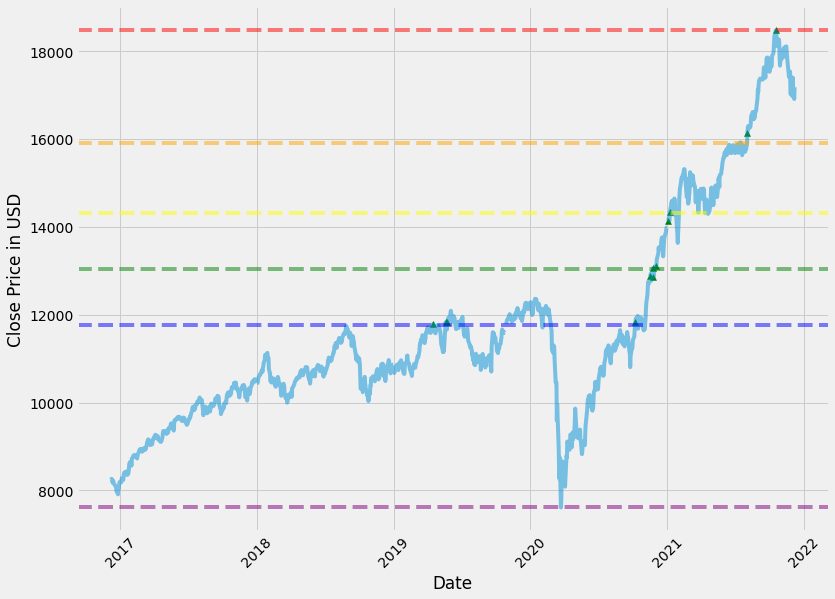

In [34]:
#plot the fibonnaci level along with close price and with the buy annd  the sell signal
new_df=df
#plot the fibonnaci levels
plt.figure(figsize=(12,9))
plt.plot(df.index,df['Close'],alpha=0.5)
plt.scatter(df.index,new_df['Buy_Signal_Price'],color='green',marker='^',alpha=1)

plt.scatter(df.index,new_df['Sell_Signal_Price'],color='green',marker='^',alpha=1)


plt.axhline(max_price,linestyle='--',alpha=0.5,color='red')
plt.axhline(first_level,linestyle='--',alpha=0.5,color='orange')
plt.axhline(second_level,linestyle='--',alpha=0.5,color='yellow')
plt.axhline(third_level,linestyle='--',alpha=0.5,color='green')
plt.axhline(fourth_level,linestyle='--',alpha=0.5,color='blue')
plt.axhline(min_price,linestyle='--',alpha=0.5,color='purple')
plt.ylabel('Close Price in USD')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()